In [62]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import os
import glob

In [63]:
output_folder = 'output/'

In [65]:
data_names = os.listdir(output_folder)
print(data_names)

['REFLECTANCE_HS-DATASET_2023-03-22_012', 'REFLECTANCE_HS-DATASET_2023-03-22_009', 'old_man_crop2', 'old_man_crop3', 'old_man_crop1', 'old_man_crop4', 'REFLECTANCE_HS-DATASET_2023-03-23_005', 'REFLECTANCE_HS-DATASET_2023-03-23_007']


In [66]:
# keep only one image from all_rgb_files based on the data_names
all_rgb_files = []
for data_name in data_names:
    for rgb_file in glob.glob(output_folder + '/*/*/*/RGB.png'):
        if data_name in rgb_file:
            all_rgb_files.append(rgb_file)
            break


In [67]:
all_rgb_files =glob.glob(output_folder + '/*/*/*/RGB.png')

In [ ]:
all_rgb_files

In [69]:
all_demosaiced_files = glob.glob(output_folder + '/*/*/*/Demosaiced_*.png')


In [70]:
images_to_plot = {}
for rgb_file in all_rgb_files:
    images_to_plot[rgb_file] = []
    for demosaiced_file in all_demosaiced_files:
        tracker_parts = rgb_file.split('/')[1] + '/' + rgb_file.split('/')[2]
        # print(tracker_parts)
        if tracker_parts in demosaiced_file:
            images_to_plot[rgb_file].append(demosaiced_file)

In [71]:
images_to_plot_v2 = images_to_plot.copy()
# take i-th key and skip i+1, i+2 and take i+3
images_to_plot = {}
target_data = [data_names[0], data_names[2]]
# keep only one image from all_rgb_files based on the target_data
for i, key in enumerate(images_to_plot_v2.keys()):
    if target_data[0] in key:
        images_to_plot[key] = images_to_plot_v2[key]
        
print(len(images_to_plot))
print(len(images_to_plot_v2))

24
192


(512, 512)
(512, 512)
(512, 512)
(512, 512)
(512, 512)
(512, 512)
(512, 512)
(512, 512)
(512, 512)
(512, 512)
(512, 512)
(512, 512)
(512, 512)
(512, 512)
(512, 512)
(512, 512)
(512, 512)
(512, 512)
(512, 512)
(512, 512)
(512, 512)
(512, 512)
(512, 512)
(512, 512)


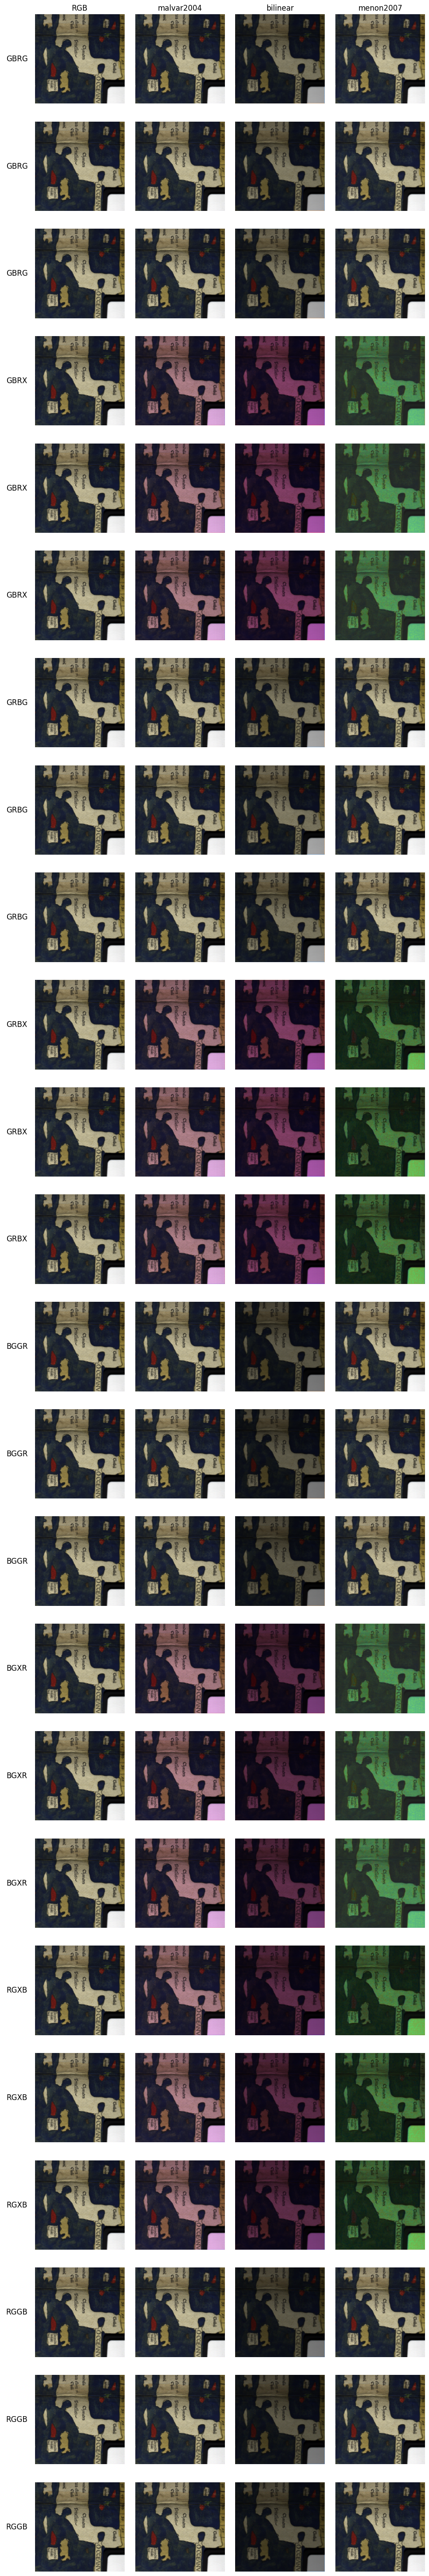

In [ ]:
import matplotlib.gridspec as gridspec
from PIL import Image

# Create a figure with a GridSpec layout
fig = plt.figure(figsize=(12, len(images_to_plot) * 3))
gs = gridspec.GridSpec(len(images_to_plot), 5, width_ratios=[1, 4, 4, 4, 4], wspace=0.0)

for i, (rgb_path, demosaiced_paths) in enumerate(images_to_plot.items()):
    # Add the pattern label on the left
    pattern = rgb_path.split('/')[-3]
    ax_label = fig.add_subplot(gs[i, 0])
    ax_label.text(0.5, 0.5, pattern, fontsize=12, ha='center', va='center', rotation=0)
    ax_label.axis("off")  # Turn off axis lines for labels

    # Add the RGB image
    ax_rgb = fig.add_subplot(gs[i, 1])
    rgb_image = Image.open(rgb_path)
    # print(rgb_image.size)
    ax_rgb.imshow(rgb_image)
    ax_rgb.axis("off")
    if i == 0:
        ax_rgb.set_title("RGB")

    # Add the demosaiced images
    for j, demosaiced_path in enumerate(demosaiced_paths):
        ax_demo = fig.add_subplot(gs[i, j + 2])
        demosaiced_image = Image.open(demosaiced_path)
        ax_demo.imshow(demosaiced_image)
        ax_demo.axis("off")
        if i == 0:
            demosaicing_algorithm = demosaiced_path.split('/')[-2]
            ax_demo.set_title(demosaicing_algorithm)

# Adjust layout
# plt.tight_layout()
plt.subplots_adjust(left=0.1, right=0.9, top=0.9, bottom=0.1)  # Fine-tune margins for better layout
plt.show()

In [ ]:
all_csv_files = glob.glob(output_folder + '/*/*/*/*.csv')

In [ ]:
all_csv_files